In [ ]:
# Importing all the libraries needed for the project
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from wordcloud import WordCloud
from datetime import datetime, timedelta

In [ ]:
# Directory Path
directory = '/content/drive/MyDrive/CSVFiles' # Please make sure the directory where all the csv files are dumped from the scraping process is replaced here

# Initializing an empty list to store DataFrame objects
dfs = []

# Running an iteration over all the CSV files in the directory mentioned
for file in os.listdir(directory):
    if file.endswith('.csv'):

        file_path = os.path.join(directory, file)
        df = pd.read_csv(file_path)
        dfs.append(df)

# Concatenating all the data frames and printing the results
result = pd.concat(dfs, ignore_index=True)
print(result)


                                            Job Title  \
0                             Data Analyst Internship   
1                                 Azure Data Engineer   
2                               IBM Datacap Developer   
3                         Enterprise Data Speclialist   
4     Test Do Not Apply - Senior Full Stack Developer   
...                                               ...   
4803         Oracle ERP Integration Automation Tester   
4804              SAP Ariba/Fieldglass Security Admin   
4805            PeopleSoft Integrator/Support Analyst   
4806                                   Okta Architect   
4807     ORMB (Oracle Revenue Management and Billing)   

                    Company Name  \
0                       Job Wize   
1                 iTech US, Inc.   
2                 P2PSoftTek Inc   
3      Genome International Corp   
4     Dice US Sales Demo Account   
...                          ...   
4803          Cliff Services Inc   
4804         Sharp Infotech

In [ ]:
from google.colab import drive
drive.mount('/content/drive') # Please make sure the directory where all the csv files are dumped from the scraping process is replaced here

Mounted at /content/drive


In [ ]:
result.shape

(4808, 12)

In [ ]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4808 entries, 0 to 4807
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Job Title             4808 non-null   object 
 1   Company Name          4808 non-null   object 
 2   Job Description       4808 non-null   object 
 3   Location              4808 non-null   object 
 4   Employment Type       4808 non-null   object 
 5   Query_Value           4808 non-null   object 
 6   Posted Scraped        4808 non-null   object 
 7   Posted On             4808 non-null   object 
 8   Updated Scraped       2846 non-null   object 
 9   Updated On            0 non-null      float64
 10  Company Link          4808 non-null   object 
 11  From Total Job Count  4808 non-null   int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 450.9+ KB


In [ ]:
result.isna().sum()

In [ ]:
# Renaming the column Query_Value to Job Domain
result = result.rename(columns={'Query_Value': 'Job Domain'})
result

,Job Title,Company Name,Job Description,Location,Employment Type,Job Domain,Posted Scraped,Posted On,Updated Scraped,Updated On,Company Link,From Total Job Count
0,Data Analyst Internship,Job Wize,Trainee Data Analyst<>REMOTEJob Description:We...,"Seattle, WA, USA",Full-time,Data Scientist Internship,15 days,2024-04-19 03:25:58.265141,15 days ago,NaN,https://www.dice.com/company/91159959?companyn...,11
1,Azure Data Engineer,"iTech US, Inc.",Need Azure Data Engineer who has some experien...,"Seattle, WA, USA",Contract,Data Scientist Internship,14 days,2024-04-20 03:25:58.265141,14 days ago,NaN,https://www.dice.com/company/10115897?companyn...,11
2,IBM Datacap Developer,P2PSoftTek Inc,IBM Datacap Developer Remote Role Description ...,"Seattle, WA, USA","Contract, Third Party",Data Scientist Internship,24 days,2024-04-10 03:25:58.266141,19 hours ago,NaN,https://www.dice.com/company/90868495?companyn...,11
3,Enterprise Data Speclialist,Genome International Corp,looking for a contractor to provide Data Gover...,"Seattle, WA, USA",Contract,Data Scientist Internship,44 days,2024-03-21 03:25:58.267141,1 day ago,NaN,https://www.dice.com/company/genwi001?companyn...,11
4,Test Do Not Apply - Senior Full Stack Developer,Dice US Sales Demo Account,Job Type: Full-time Location: Greenwood Villag...,"Seattle, WA, USA",Full-time,Data Scientist Internship,18 days,2024-04-16 03:25:58.267141,4 days ago,NaN,https://www.dice.com/company/dicedemo?companyn...,11
...,...,...,...,...,...,...,...,...,...,...,...,...
4803,Oracle ERP Integration Automation Tester,Cliff Services Inc,Role: Oracle ERP Integration Automation Tester...,"Austin, TX, USA","Contract, Third Party",Data Engineer,7 days,2024-04-27 02:57:04.364643,NaN,NaN,https://www.dice.com/company/91140876?companyn...,111
4804,SAP Ariba/Fieldglass Security Admin,Sharp Infotech Inc.,Required Qualifications: Education/certificati...,"Austin, TX, USA","Contract, Third Party",Data Engineer,1 day,2024-05-03 02:57:04.364643,NaN,NaN,https://www.dice.com/company/91098636?companyn...,111
4805,PeopleSoft Integrator/Support Analyst,Anveta Inc,Role: PeopleSoft Integrator/Support Analyst Lo...,"Austin, TX, USA","Contract, Third Party",Data Engineer,35 days,2024-03-30 02:57:04.366198,25 days ago,NaN,https://www.dice.com/company/10312854?companyn...,111
4806,Okta Architect,Rekruitd,Role : Okta Architect Location : 100% Remote U...,"Austin, TX, USA","Contract, Third Party",Data Engineer,7 days,2024-04-27 02:57:04.367247,NaN,NaN,https://www.dice.com/company/91125865?companyn...,111


In [ ]:
result.columns

In [ ]:
employee_type_distribution = result.groupby('Employment Type').size()
print(employee_type_distribution)

Employment Type
Contract                   998
Contract, Third Party     1842
Full-time                  852
Full-time, Third Party     344
Part-time                   35
Third Party, Contract      737
dtype: int64


In [ ]:
# Contract, Third Party && Full-Time, Third Party && Third Party, Contract values are all the same and fall under the Bracket of 'Contract' which is grouped together

In [ ]:
replacement_dictionary = {
    'Contract, Third Party': 'Contract',
    'Full-time, Third Party': 'Contract',
    'Third Party, Contract': 'Contract'
}

# Replace similar values into one
result['Employment Type'] = result['Employment Type'].replace(replacement_dictionary)

# Now, check the unique values in the 'Employment Type' column
print(result['Employment Type'].unique())

['Full-time' 'Contract' 'Part-time']


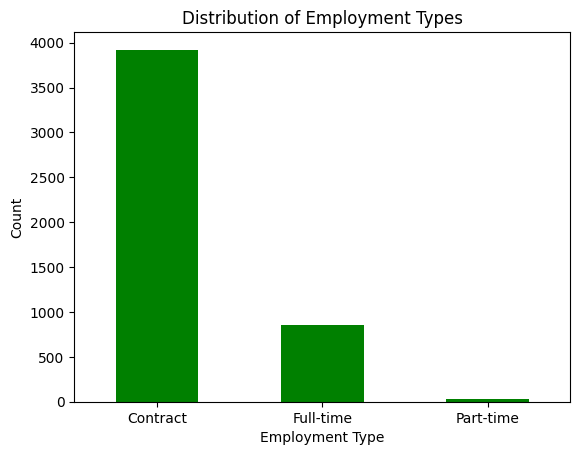

In [ ]:
employment_type_plot = result[result['Employment Type'].isin(['Contract', 'Full-time', 'Part-time'])]

employment_type_distribution = employment_type_plot.groupby('Employment Type').size()

# Plot the distribution
ax = employment_type_distribution.plot(kind='bar', color='green')
plt.title('Distribution of Employment Types')
plt.xlabel('Employment Type')
plt.ylabel('Count')
plt.xticks(rotation=0)

plt.show()

In [ ]:
# Finding the job distribution across different location in numbers
location_type_distribution = result.groupby('Location').size()
print(location_type_distribution)

Location
Austin, TX, USA           658
Chicago, IL, USA          655
Dallas, TX, USA           698
New Jersey, USA           157
New York, NY, USA         688
San Francisco, CA, USA    645
San Jose, CA, USA         656
Seattle, WA, USA          651
dtype: int64


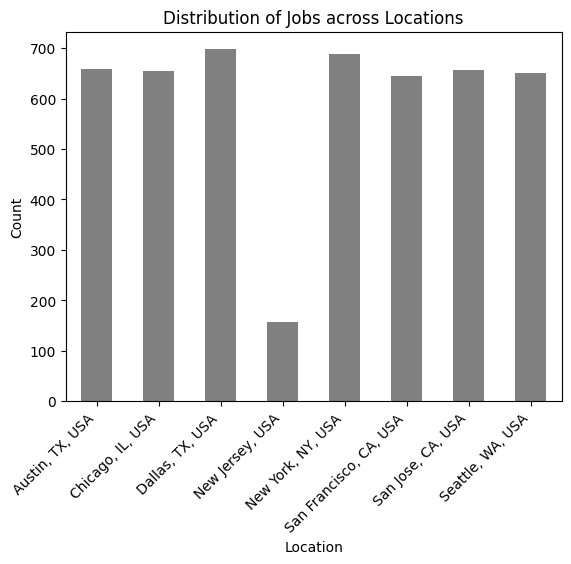

In [ ]:
# Plotting the above numbers
location_type_distribution.plot(kind='bar', color='grey')
plt.title('Distribution of Jobs across Locations')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

plt.show()


In [ ]:
print(result['Job Title'])

0                               Data Analyst Internship
1                                   Azure Data Engineer
2                                 IBM Datacap Developer
3                           Enterprise Data Speclialist
4       Test Do Not Apply - Senior Full Stack Developer
                             ...                       
4803           Oracle ERP Integration Automation Tester
4804                SAP Ariba/Fieldglass Security Admin
4805              PeopleSoft Integrator/Support Analyst
4806                                     Okta Architect
4807       ORMB (Oracle Revenue Management and Billing)
Name: Job Title, Length: 4808, dtype: object


In [ ]:
# Finding the distinct value of the 'Job Title' column
unique_values_count = result['Job Title'].nunique()

print("Number of unique values in column:", unique_values_count)

Number of unique values in column: 297


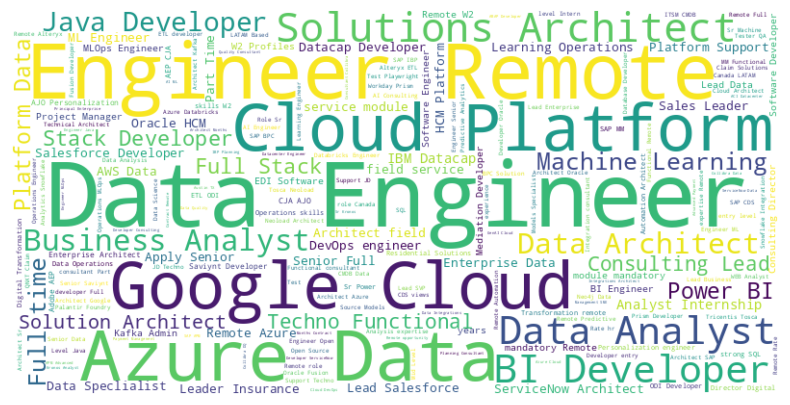

In [ ]:
# worldcloud to see the density of the word occurrences in the job title
text = ' '.join(result['Job Title'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [ ]:
# Next we get the number of unique job domains and the unique location to understand distribution of the jobs falling under specific job domains across locations

In [ ]:
values_count = result['Job Domain'].nunique()
print("Number of unique values in column:", values_count)

Number of unique values in column: 12


In [ ]:
unique_locations = result['Location'].unique()
print("Unique Locations:")
for location in unique_locations:
    print(location)

Unique Locations:
Seattle, WA, USA
San Jose, CA, USA
San Francisco, CA, USA
New York, NY, USA
New Jersey, USA
Dallas, TX, USA
Chicago, IL, USA
Austin, TX, USA


In [ ]:
unique_domains = result['Job Domain'].unique()
print("Unique Domains:")
for domain in unique_domains:
    print(domain)

Unique Domains:
Data Scientist Internship
Data Internship Internship
Data Internship
Data Scientist
Data Analytics Internship
Data Engineer
Data Analytics
Data Engineer Internship
Business Analytics Internship
Business Analyst
Business Analytics
Business Analyst Internship


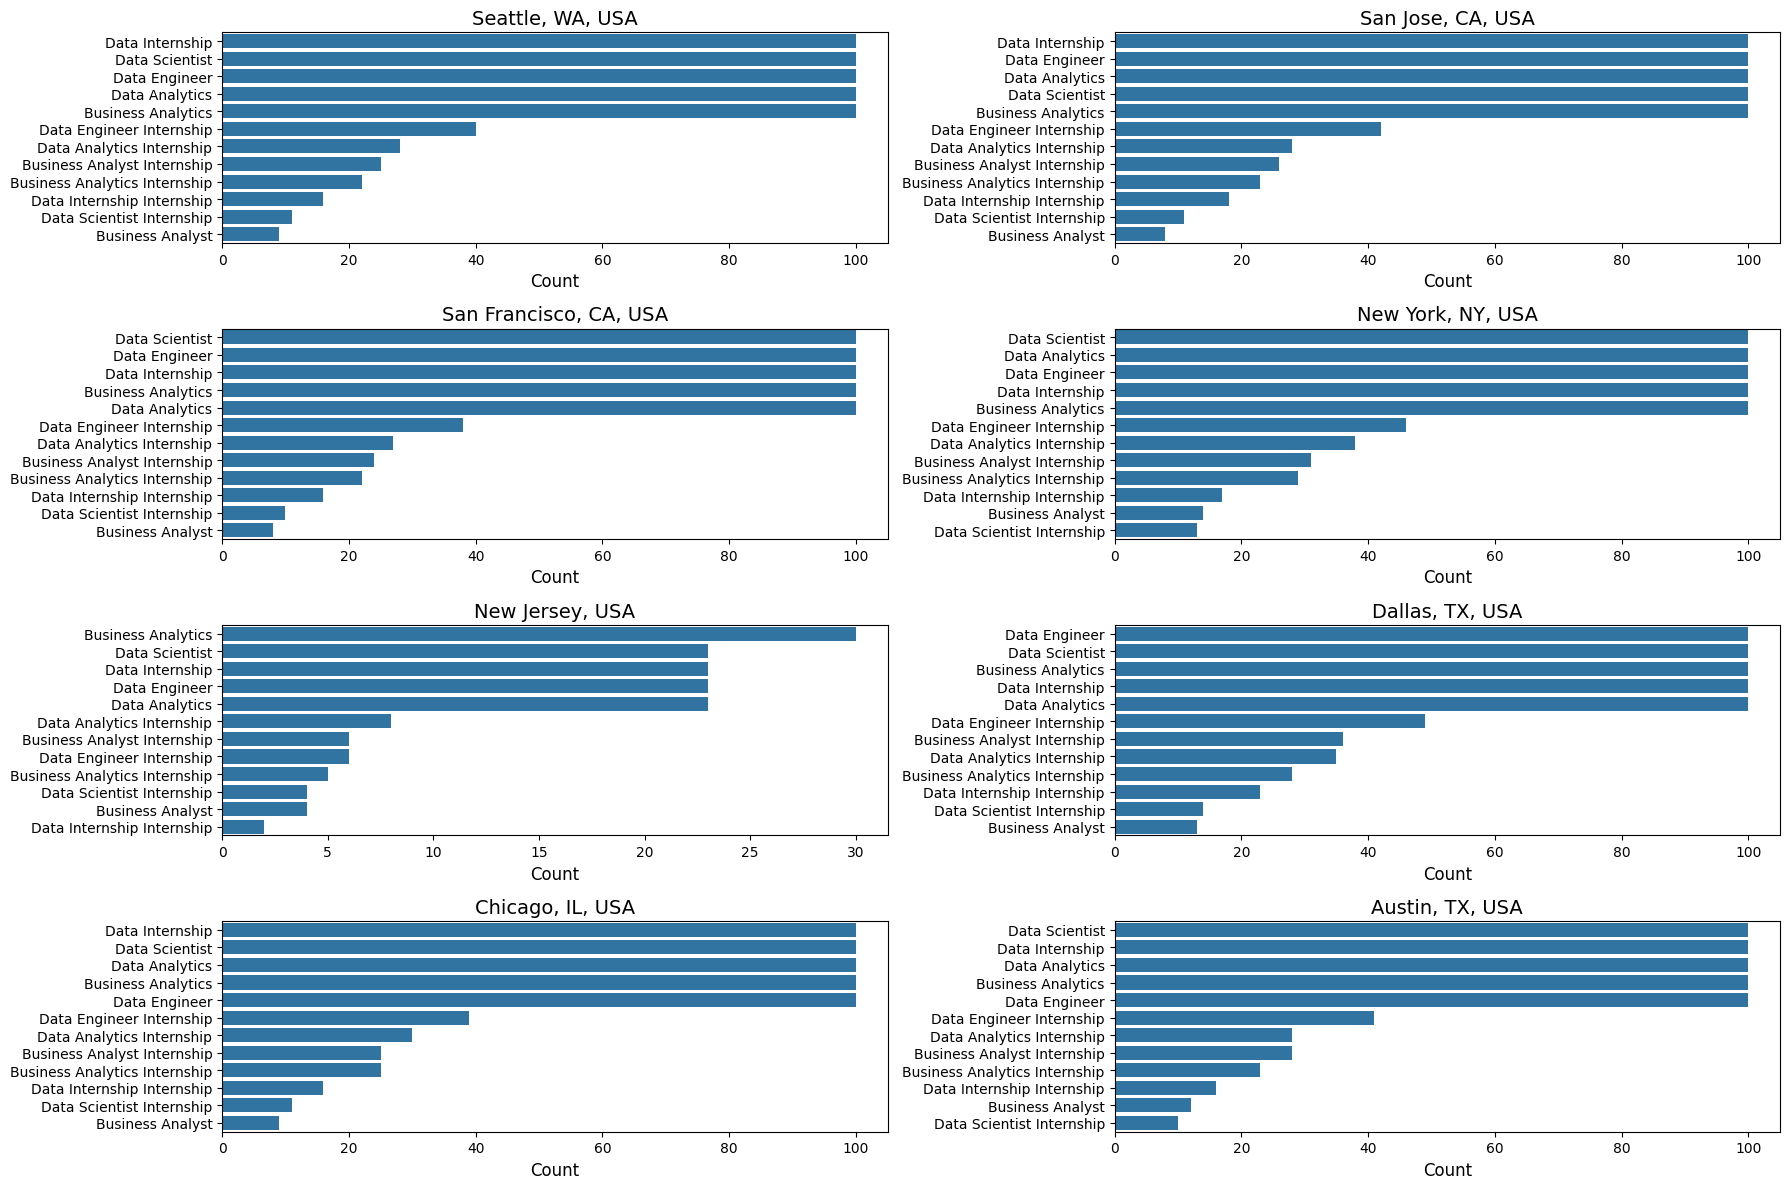

In [ ]:
# Set the figure size and font size
plt.figure(figsize=(18, 12))

# Plot count plots for each location
for i, location in enumerate(unique_locations, start=1):
    plt.subplot(4, 2, i)
    sns.countplot(data=result[result['Location'] == location], y='Job Domain', order=result[result['Location'] == location]['Job Domain'].value_counts().index)
    plt.title(location, fontsize=14)
    plt.xlabel('Count', fontsize=12)
    plt.tick_params(axis='both', which='major', labelsize=10)
    plt.ylabel('')

plt.tight_layout()
plt.show()


In [ ]:
# Convert Posted On column to datetime
result['Posted On'] = pd.to_datetime(result['Posted On'])

# Current date and time
current_date = datetime.now()

# Calculate differences in thed ay
result['Days Ago'] = (current_date - result['Posted On']).dt.days

# Filtering jobs posted in the last 30, 60, and 100 days respec.
jobs_last_30_days = result[result['Days Ago'] <= 30]
jobs_last_60_days = result[(result['Days Ago'] > 30) & (result['Days Ago'] <= 60)]
jobs_last_100_days = result[(result['Days Ago'] > 60) & (result['Days Ago'] <= 100)]

# Count number of jobs posted in each time frame respec.
num_jobs_last_30_days = len(jobs_last_30_days)
num_jobs_last_60_days = len(jobs_last_60_days)
num_jobs_last_100_days = len(jobs_last_100_days)

# Distribution of job titles posted in the last 30, 60, and 100 days respec.
title_distribution_last_30_days = jobs_last_30_days['Job Title'].value_counts()
title_distribution_last_60_days = jobs_last_60_days['Job Title'].value_counts()
title_distribution_last_100_days = jobs_last_100_days['Job Title'].value_counts()

print("Number of jobs posted in the last 30 days:", num_jobs_last_30_days)
print("Number of jobs posted in the last 60 days:", num_jobs_last_60_days)
print("Number of jobs posted in the last 100 days:", num_jobs_last_100_days)

print("\nDistribution of Job Titles posted in the last 30 days:")
print(title_distribution_last_30_days)

print("\nDistribution of Job  posted in the last 60 days:")
print(title_distribution_last_100_days)


Number of jobs posted in the last 30 days: 3681
Number of jobs posted in the last 60 days: 626
Number of jobs posted in the last 100 days: 501

Distribution of Job Titles posted in the last 30 days:
Job Title
Data Analyst Internship                                            77
IBM Datacap Developer                                              77
Lead Salesforce Developer                                          69
ServiceNow Architect field service module mandatory , Remote       63
Test Do Not Apply - Senior Full Stack Developer                    63
                                                                   ..
SAP RTE/ Agile Coach                                                1
Sr System Engineer                                                  1
Senior collateralized Loan obligation (CLO) Implementation Lead     1
Project Manager Financial                                           1
SAP FICO CONSULTANT                                                 1
Name: count, Length: 

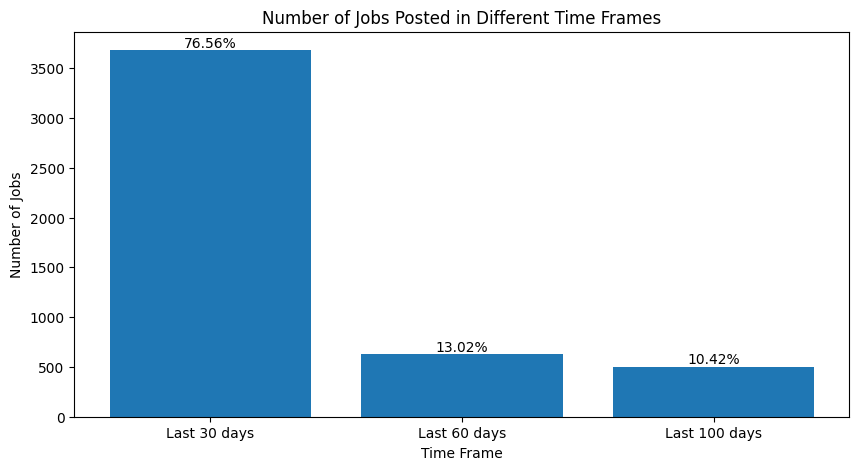

In [ ]:
total_jobs = len(result)

jobs_last_30 = len(jobs_last_30_days)  # Calculating job number in the last 30 days posted in each time frame
jobs_last_60 = len(jobs_last_60_days)  # last 69 days  (between 31st to 60th day)
jobs_last_100= len(jobs_last_100_days) # last 100 days (between 61st to 100th day)

# Calculate the percentage of jobs posted in each time frame
percent_last_30_days = (jobs_last_30 / total_jobs) * 100
percent_last_60_days = (jobs_last_60 / total_jobs) * 100
percent_last_100_days = (jobs_last_100 / total_jobs) * 100

# visualizing
plt.figure(figsize=(10, 5))
bars = plt.bar(['Last 30 days', 'Last 60 days', 'Last 100 days'],
               [len(jobs_last_30_days), len(jobs_last_60_days), len(jobs_last_100_days)])

# Adding percentage on the top of bar
for bar, percent in zip(bars, [percent_last_30_days, percent_last_60_days, percent_last_100_days]):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 0.1, f'{percent:.2f}%',
             ha='center', va='bottom')

plt.title('Number of Jobs Posted in Different Time Frames')
plt.xlabel('Time Frame')
plt.ylabel('Number of Jobs')
plt.show()

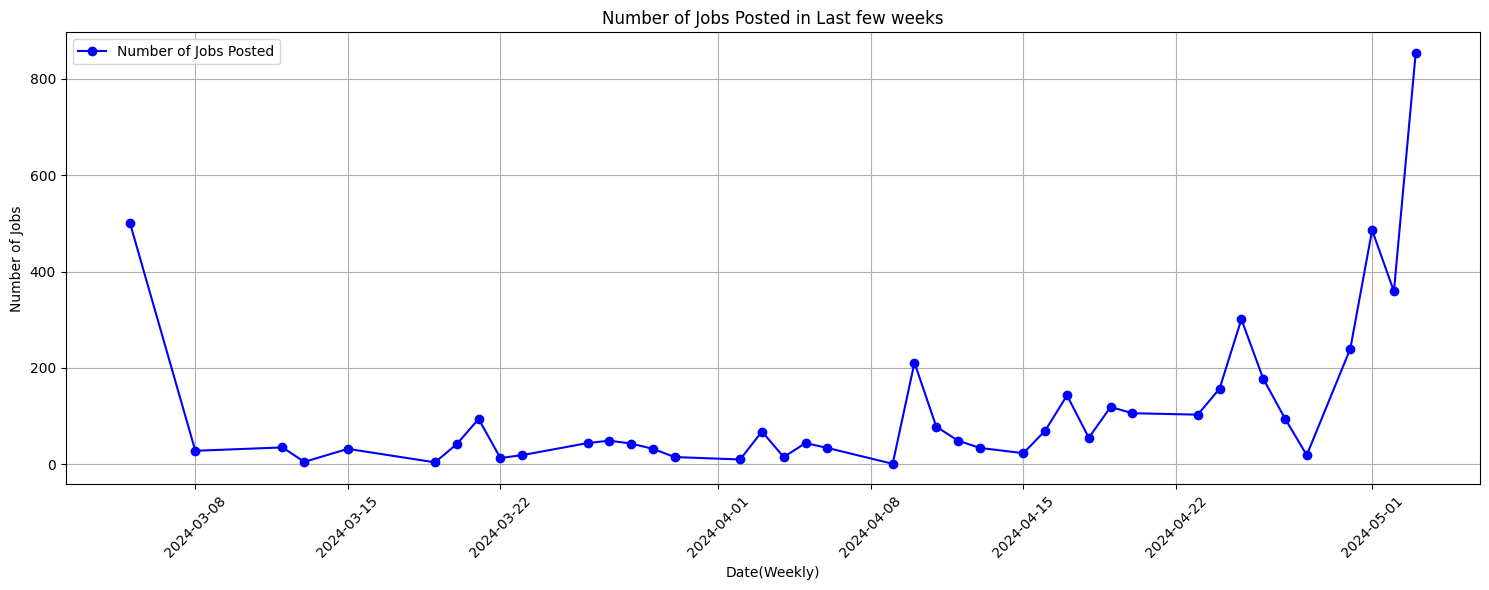

In [ ]:
result['Posted On'] = pd.to_datetime(result['Posted On'])
result['Days Ago'] = (pd.Timestamp.now() - result['Posted On']).dt.days

# Jobs posted in the last 90 days
jobs_last_90_days = result[result['Days Ago'] <= 90]

# Grouping by date and count the numbers each day
jobs_by_date = jobs_last_90_days.groupby(jobs_last_90_days['Posted On'].dt.date).size()

# Plotting
plt.figure(figsize=(15, 6))
jobs_by_date.plot(marker='o', linestyle='-', color='b', label='Number of Jobs Posted')
plt.title('Number of Jobs Posted in Last few weeks')
plt.xlabel('Date(Weekly)')
plt.ylabel('Number of Jobs')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

In [ ]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import spacy

nlp = spacy.load('en_core_web_sm')

def extract_skills(job_description):
    exclude_words = ['experience', 'business', 'management','position', 'years', 'location', '', 'requirement', 'requirements', 'role', 'engineer', 'jobs', 'job', 'remote', 'data']

    skills = []
    doc = nlp(job_description)
    for token in doc:
        if token.pos_ in ['NOUN', 'PROPN'] and token.text.lower() not in exclude_words:
            skills.append(token.text.lower())
    return skills

# Get unique job domains
unique_job_domains = result['Job Domain'].unique()

# Group by job domain and extract skills
skills_per_query = {}
for query_value in unique_job_domains:
    job_descriptions = result[result['Job Domain'] == query_value]['Job Description']
    skills = []
    for job_description in job_descriptions:
        skills.extend(extract_skills(job_description))
    skills_per_query[query_value] = skills

for query_value, skills in skills_per_query.items():
    skill_counts = Counter(skills)
    wordcloud = WordCloud(background_color='white').generate_from_frequencies(skill_counts)
    plt.figure(figsize=(8, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Skills for Job Domain: {query_value}')
    plt.axis('off')
    plt.show()


In [ ]:
unique_df = result.drop_duplicates(subset=['Job Title', 'Company Name', 'Location', 'Job Description'])

unique_df.reset_index(drop=True, inplace=True)

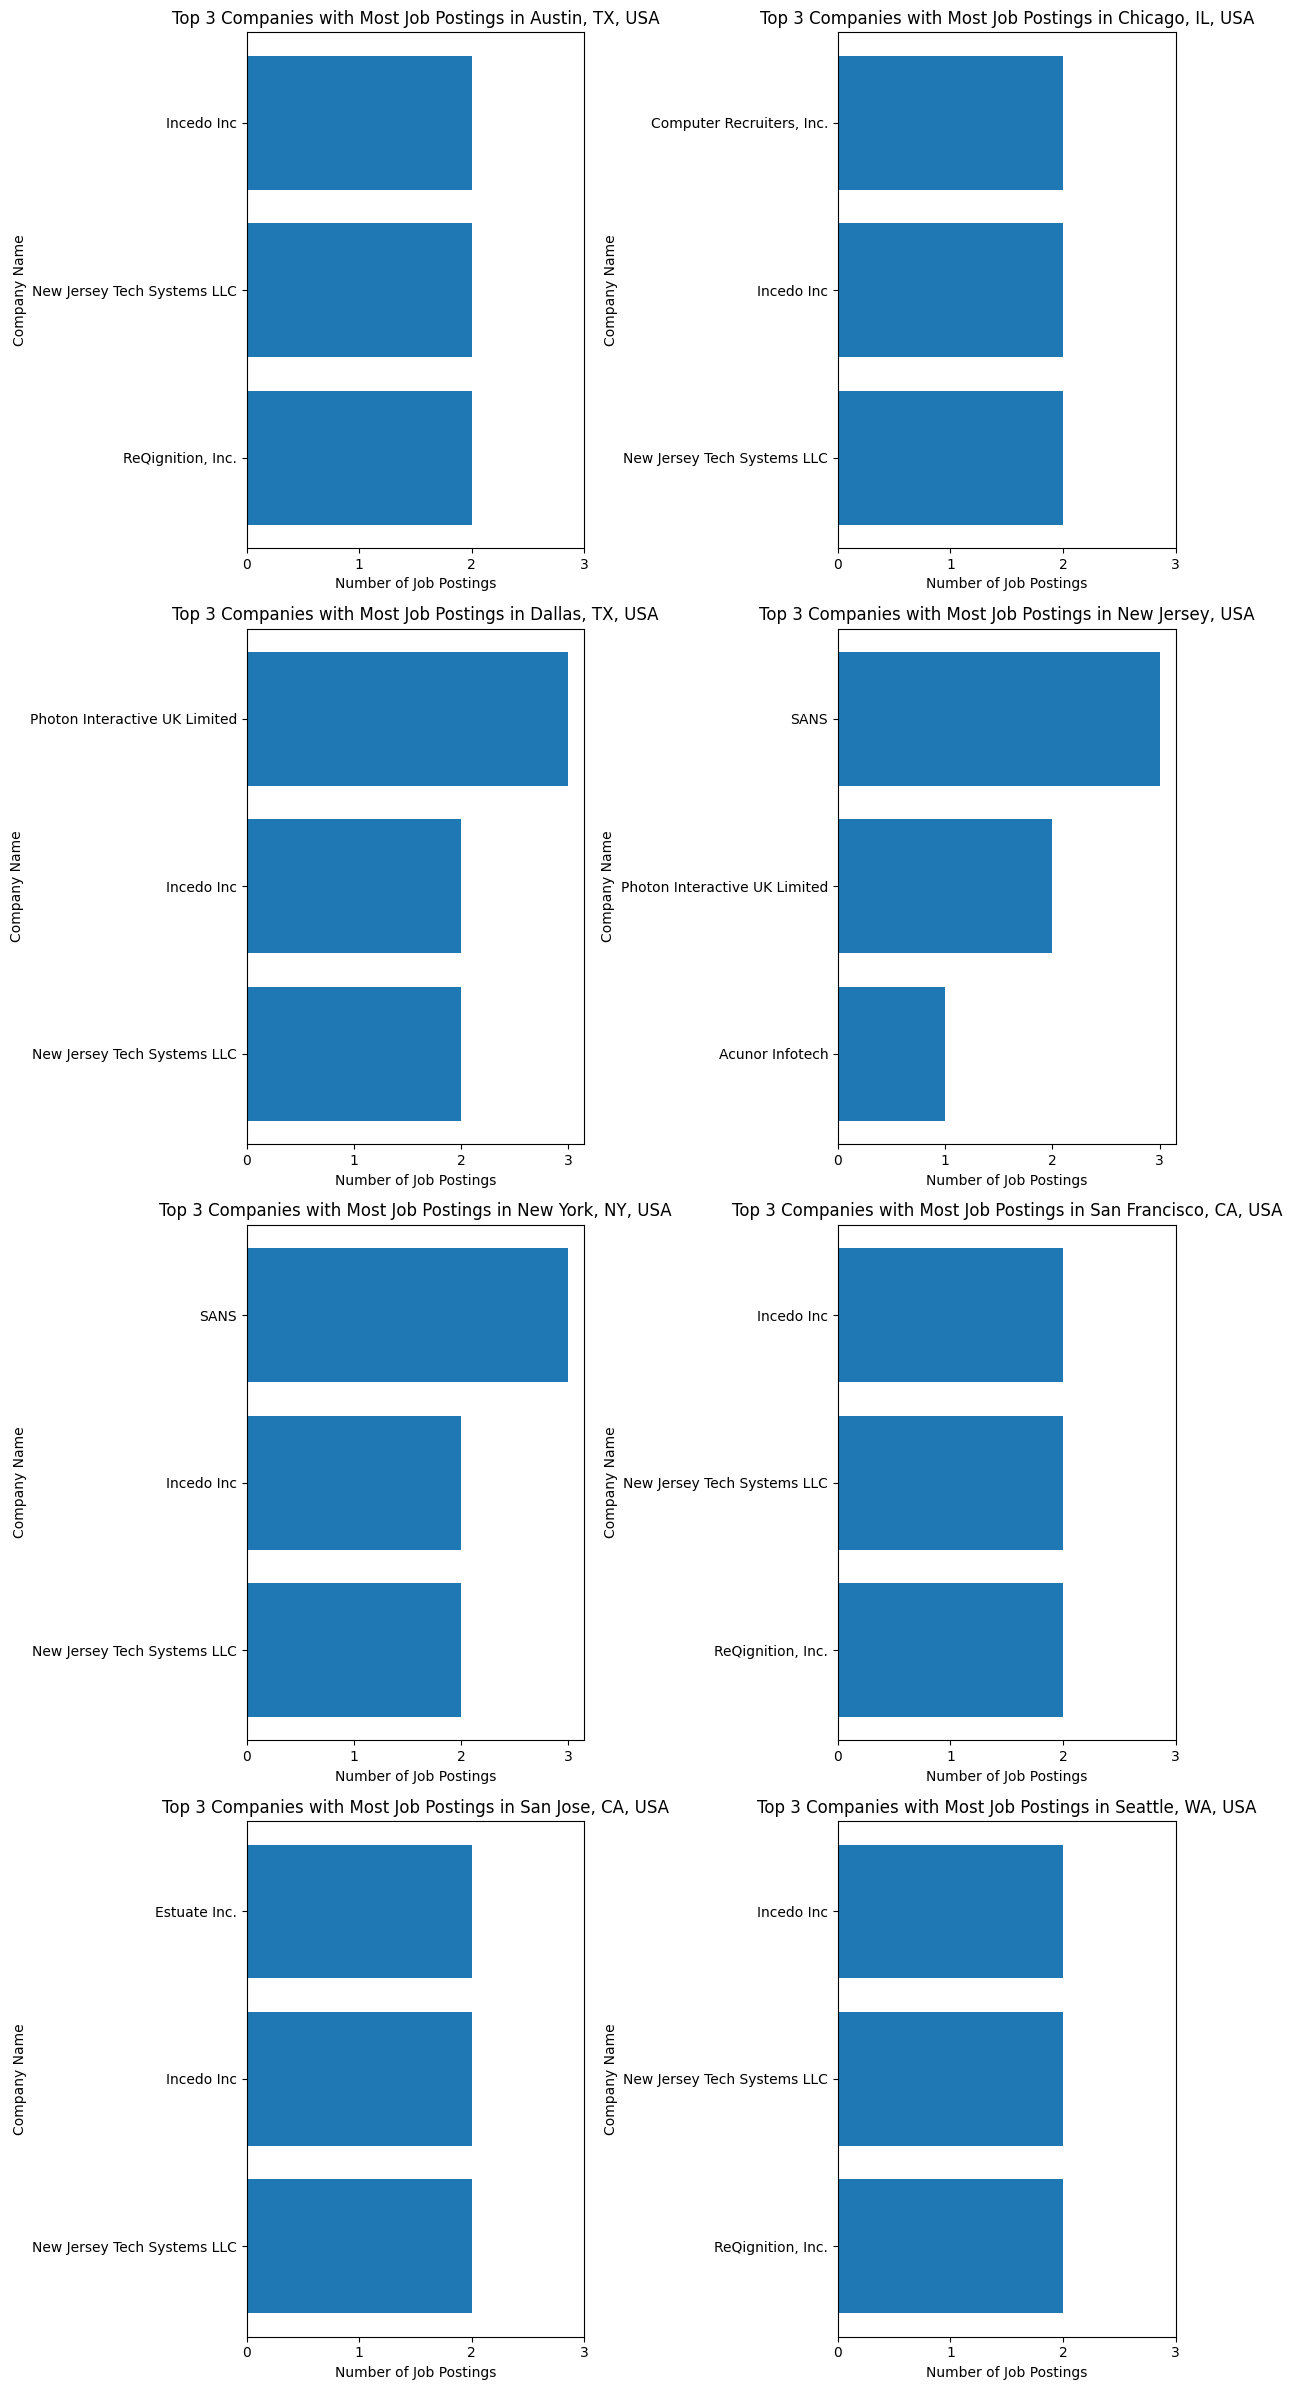

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

full_time_df = unique_df[unique_df['Employment Type'] == 'Full-time']

grouped_df = full_time_df.groupby(['Location', 'Company Name']).size().reset_index(name='Job Count')

top_companies_per_location = grouped_df.groupby('Location').apply(lambda x: x.nlargest(3, 'Job Count')).reset_index(drop=True)

num_locations = len(top_companies_per_location['Location'].unique())
num_cols = 2
num_rows = (num_locations + 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 6*num_rows))

axes = axes.flatten()

for i, (location, data) in enumerate(top_companies_per_location.groupby('Location')):
    ax = axes[i]
    ax.barh(data['Company Name'], data['Job Count'])
    ax.set_title(f'Top 3 Companies with Most Job Postings in {location}')
    ax.set_xlabel('Number of Job Postings')
    ax.set_ylabel('Company Name')
    ax.set_xticks(np.arange(0, 4, step=1.0))
    ax.invert_yaxis()

plt.tight_layout()
plt.show()

